In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/shamn/Downloads/Employee.csv")

In [3]:
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [5]:
data.duplicated().sum()

4

In [6]:
data=data.drop_duplicates()
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [7]:
data.describe()

,Age,Salary,Gender
count,127.000000,121.000000,144.000000
mean,30.527559,5283.471074,0.222222
std,11.114717,2585.373600,0.417191
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,37.500000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [8]:
data.isnull().sum()

Company     8
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [9]:
data.skew(numeric_only=True)

Age      -0.609708
Salary    0.185252
Gender    1.350414
dtype: float64

In [10]:
for column in data.columns:
    unique_values=data[column].unique()

In [11]:
print('column',{column},'unique values:',{len(unique_values)})

column {'Gender'} unique values: {2}


In [12]:
q1=data['Gender'].quantile(0.25)
q3=data['Gender'].quantile(0.75)
IQR=q3-q1
lower_whisker=q1-1.5*IQR
upper_whisker=q3+1.5*IQR
print('lower_whisker',lower_whisker)
print('upper_whisker',upper_whisker)

lower_whisker 0.0
upper_whisker 0.0


In [13]:
data[(data['Gender']< lower_whisker) | (data['Gender']>upper_whisker)]

,Company,Age,Salary,Place,Country,Gender
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
24,TCS,NaN,7084.0,Chennai,India,1
25,Infosys,23.0,8943.0,Mumbai,India,1
26,TCS,34.0,8345.0,Calcutta,India,1
27,CTS,45.0,9284.0,Delhi,India,1
28,CTS,23.0,9876.0,Mumbai,India,1
35,TCS,35.0,9024.0,NaN,India,1
44,TCS,35.0,8000.0,Noida,India,1


In [14]:
data['Age'].replace(np.nan,0,inplace=True)

C:\Users\shamn\AppData\Local\Temp\ipykernel_20880\865246926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'].replace(np.nan,0,inplace=True)


In [15]:
m=data['Company'].mode()[0]
data['Company'].fillna(m,inplace=True)

C:\Users\shamn\AppData\Local\Temp\ipykernel_20880\2047407467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Company'].fillna(m,inplace=True)


In [16]:
x=data['Age'].mean()
data['Age'].fillna(x,inplace=True)

C:\Users\shamn\AppData\Local\Temp\ipykernel_20880\3307086673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'].fillna(x,inplace=True)


In [17]:
y=data['Salary'].mean()
data['Salary'].fillna(y,inplace=True)

C:\Users\shamn\AppData\Local\Temp\ipykernel_20880\1673681657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Salary'].fillna(y,inplace=True)


In [18]:
z=data['Place'].mode()[0]
data['Place'].fillna(z,inplace=True)

C:\Users\shamn\AppData\Local\Temp\ipykernel_20880\3053911955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Place'].fillna(z,inplace=True)


In [19]:
fil_data=data[(data['Age']>40) & (data['Salary']<5000)]
fil_data

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


In [20]:
import seaborn as sns

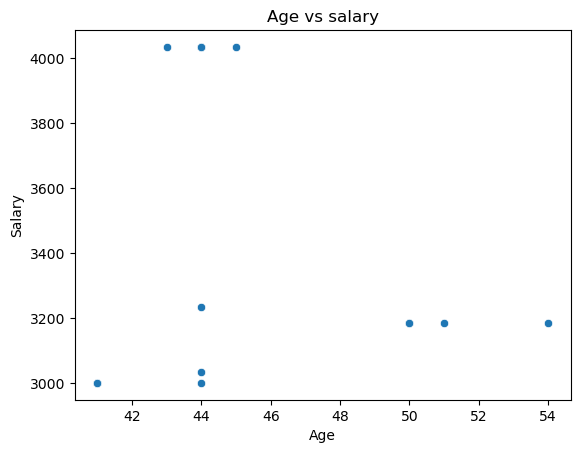

In [21]:
sns.scatterplot(x='Age',y='Salary', data=fil_data)
plt.title('Age vs salary')
plt.show()

In [22]:
place_count=data['Place'].value_counts()
place_count

Place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

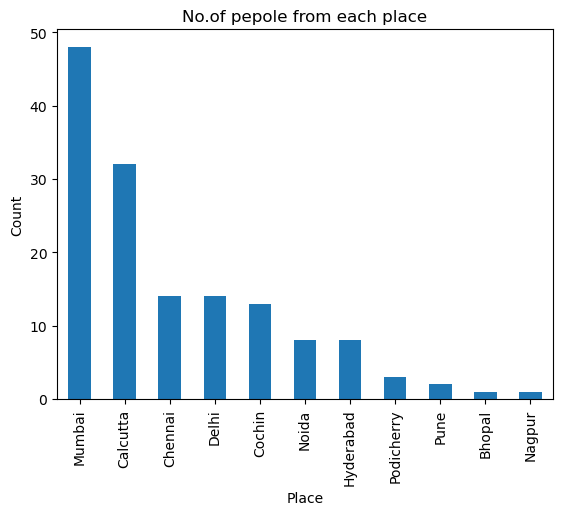

In [23]:
place_count.plot(kind='bar')
plt.ylabel('Count')
plt.title('No.of pepole from each place')
plt.show()

In [24]:
df_encoded=pd.get_dummies(data,drop_first=True)

In [25]:
df_encoded=df_encoded.astype(int)

In [26]:
df_encoded

,Age,Salary,Gender,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,20,5283,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,30,5283,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,35,2300,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,40,3000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,23,4000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22,8202,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
143,33,9024,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
145,44,4034,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
146,33,5034,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [27]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [28]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
scaled_standard=scaler.fit_transform(df_encoded)

In [29]:
minmax_scaler=MinMaxScaler()
scaled_minmax=minmax_scaler.fit_transform(df_encoded)